<a href="https://colab.research.google.com/github/Yaaxek/-Pandas-seleccionar-y-agrupar-datos/blob/main/Pandas_Impacto_de_los_GEI_en_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Conociendo los datos**

Analizaremos datos de emisiones de gases de efecto invernadero en Brasil y crearemos tablas y visualizaciones para comprender los datos y generar insights a partir de ellos. Los datos fueron extraídos del SEEG.

---
ℹ Fuente: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatorio de Clima, accesado en http://seeg.eco.br:

- [Download de la base de datos](http://seeg.eco.br/download)
---

Primero, vamos a importar la biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) y los datos que serán utilizados. Como los datos están en un archivo excel, vamos a usar la función [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

##Leyendo la base de datos

In [1]:
import pandas as pd

In [2]:
emisiones_gases=pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados')

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
emisiones_gases.sample(5)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
25314,Energia,Emissões pela Queima de Combustíveis,Agropecuário,NaN,Biodiesel,Consumo Final Energético,Emissão,CO2e (t) GTP-AR5,PA,AGROPEC,...,214.921232,253.569257,272.956922,396.577824,404.629489,561.043776,676.119919,487.188965,491.172426,446.562304
6893,Agropecuária,Manejo de Dejetos Animais,Indiretas,Outros,Animal,Suínos,Emissão,CO2e (t) GTP-AR5,CE,PEC,...,11454.358401,10875.385381,11355.426671,12208.377093,12125.145347,11097.524996,11368.096162,11456.810511,11742.077561,11793.813713
46341,Energia,Emissões pela Queima de Combustíveis,Industrial,Mineração e pelotização,Gás natural seco,Centrais Elétricas Autoprodutoras,Emissão,CO2e (t) GTP-AR2,MG,ENE_ELET,...,5778.450711,5226.415781,385.808607,12.125599,6199.296187,6199.296187,6002.080310,5152.825367,4794.515457,5438.277736
33416,Energia,Emissões pela Queima de Combustíveis,Industrial,Alimentos e bebidas,Diesel de petróleo,Consumo Final Energético,Emissão,CH4 (t),PR,OUTRA_IND,...,2.691236,3.062455,3.393231,2.941871,3.329872,3.252796,3.169082,2.859571,2.691548,2.647070
16839,Agropecuária,Solos Manejados,Indiretas,Deposição Atmosférica,Animal,Ovino,Emissão,CO2e (t) GWP-AR2,PE,PEC,...,9712.525631,10757.086804,11307.649118,14202.427553,14567.598534,13487.257714,13797.469419,17383.631192,19410.590150,20187.559059


Vamos a revisar la estructura con el metodo **info()**

In [4]:
emisiones_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

## Ajustando la base datos

Solo nos interesan las emisiones de gases fenerados por los estados que estan en el inventario nacional, por lo que identificaremos los tipos de datos unicos en la columna Emissão / Remoção / Bunker

Remoção:datos referentes a la eliminacion de gases, lo contrario a las emisiones

NCI: son datos no incluidos en el inventario nacional.

Bunker: emisiones del transporte maritimo y aereo internacional, no son emisiones direcas de los estado.

In [5]:
emisiones_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Se analizara primero los datos de remoção (eliminacion), para identificar si todos ellos son de retirada de gases de efecto invernadero.

In [6]:
#Se revisara que los datos esten correctamente asignado
(emisiones_gases['Emissão / Remoção / Bunker']=='Remoção NCI') | (emisiones_gases['Emissão / Remoção / Bunker']=='Remoção')

,Emissão / Remoção / Bunker
0,False
1,False
2,False
3,False
4,False
...,...
103307,False
103308,False
103309,False
103310,False


In [7]:
emisiones_gases[emisiones_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI','Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [8]:
emisiones_gases.loc[emisiones_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI','Remoção']),1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para verificar si todos son negativos, vamos a utiliza la funcion **max()**, si alguno es mayor que 0 esta mal clasificado deberia de estar en emision

In [9]:
emisiones_gases.loc[emisiones_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI','Remoção']),1970:2021].max()

,0
1970,0.0
1971,0.0
1972,0.0
1973,0.0
1974,0.0
1975,0.0
1976,0.0
1977,0.0
1978,0.0
1979,0.0


Ya se verifico que si esta en remocion entonces se podran eliminar

Se analizara ahora Bunker para verificar que si es fuera del Estado

In [10]:
emisiones_gases.loc[emisiones_gases['Emissão / Remoção / Bunker']=='Bunker', 'Estado'].unique()

array([nan], dtype=object)

Ya se verifico que fue en aguas internacionales, asi que tambien se puede borrar

In [11]:
emision_gases=emisiones_gases[emisiones_gases['Emissão / Remoção / Bunker']=='Emissão']
emision_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


In [12]:
emision_gases=emision_gases.drop(columns='Emissão / Remoção / Bunker')
emision_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


# 2. Agrupamiento de los datos

##Modificando el formato del DataFrame

Transformar de wide a long

In [13]:
import pandas as pd

In [14]:
emision_gases.loc[:,'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [15]:
columnas_info=list(emision_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
columnas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [16]:
emisiones_gases.loc[:,1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [17]:
columnas_emision=list(emisiones_gases.loc[:,1970:2021].columns)
columnas_emision

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para modificar vamos a usar el metodo **melt()** para pasar de wide a long

id_vars: lo que quiero conservar

value_vars: lo que quiero modificar

var_name:nombre de lo modificado

value_name: donde se guardan los nuevos valores

In [18]:
emisiones_por_ano=emision_gases.melt(id_vars=columnas_info, value_vars=columnas_emision, var_name='Año', value_name='Emision')
emisiones_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


#Analisis de las emisiones

In [19]:
emisiones_por_ano.groupby('Gás')

In [20]:
emisiones_por_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [21]:
emisiones_por_ano.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


In [27]:
emisiones_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4926896 entries, 0 to 4926895
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Nível 1 - Setor      object 
 1   Nível 2              object 
 2   Nível 3              object 
 3   Nível 4              object 
 4   Nível 5              object 
 5   Nível 6              object 
 6   Gás                  object 
 7   Estado               object 
 8   Atividade Econômica  object 
 9   Produto              object 
 10  Año                  object 
 11  Emision              float64
dtypes: float64(1), object(11)
memory usage: 451.1+ MB


In [29]:
emisiones_por_ano.groupby('Gás')['Emision'].sum(numeric_only=True)

,Emision
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [31]:
emisiones_por_gas=emisiones_por_ano.groupby('Gás')['Emision'].sum(numeric_only=True).sort_values(ascending=False)
emisiones_por_gas

,Emision
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


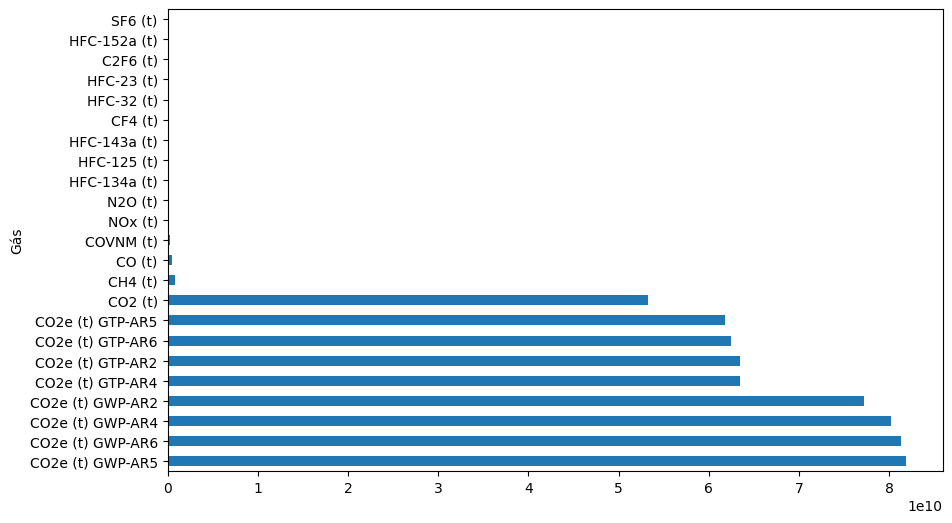

In [35]:
emisiones_por_gas.plot(kind='barh', figsize=(10,6));

In [36]:
emisiones_por_gas.iloc[0:9]

,Emision
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [37]:
#Saber que porcentaje se tiene en los gases CO2 que son los que tenemos en mayoria
float(emisiones_por_gas.iloc[0:9].sum() / emisiones_por_gas.sum())*100

99.73625255007093

In [39]:
print(f'Las emisiones de CO2 orresponden a {float(emisiones_por_gas.iloc[0:9].sum() / emisiones_por_gas.sum())*100:.2f} % de las emisiones totales de gases de efecto invernadero en Brasil de 1970 a 2021')

Las emisiones de CO2 orresponden a 99.74 % de las emisiones totales de gases de efecto invernadero en Brasil de 1970 a 2021


#**3. Agrupamiento multi-index**

Descubrir cuales son los sectores mas contaminantes por cada gas

Descubrir cuales son los gases mas contaminantes por cada sector

Se puede usar el metodo cross section **xs()** para la seleccion especifica de gas CO2 y extraer el valor maximo y el indice maximo con el metodo **max() y idxmax()**

SECTOR MAS CONTAMINANTE POR CADA GAS

In [49]:
gas_por_sector=emisiones_por_ano.groupby(['Gás','Nível 1 - Setor']).sum(numeric_only=True)
gas_por_sector

Emision
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [50]:
gas_por_sector.xs('CO2 (t)', level=0)

,Emision
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [52]:
gas_por_sector.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'),level=[0,1])

,,Emision
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [53]:
gas_por_sector.xs('CO2 (t)',level=0).max()

,0
Emision,3.733930e+10


In [54]:
gas_por_sector.xs('CO2 (t)',level=0).idxmax()

,0
Emision,Mudança de Uso da Terra e Floresta


In [55]:
gas_por_sector.xs('CO2 (t)',level=0).idxmin()

,0
Emision,Resíduos


In [56]:
gas_por_sector.xs('CO2 (t)',level=0).min()

,0
Emision,2.276264e+07


#**Desafio**

Encuentre los valores únicos de las columnas "Nível 1 - Setor" y "Estado" para identificar las actividades económicas presentes en la base de datos y si todos los estados brasileños están presentes en el DataFrame.



In [22]:
emisiones_gases['Nível 1 - Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [23]:
emisiones_gases['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR', 'BR'], dtype=object)

Filtrar el DataFrame sólo con datos de estados de la región sur de Brasil.



In [24]:
sur=emisiones_gases[emisiones_gases['Estado'].isin(['PR','RS','SC'])]
sur


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2 (t),PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
36,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
37,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2e (t) GTP-AR2,PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
110,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2 (t),PR,CIM,...,2.012596e+06,2.212002e+06,2.241143e+06,2.176752e+06,2.279061e+06,2.115372e+06,2.173266e+06,2.230656e+06,2.488650e+06,2.845457e+06
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2 (t),SC,CIM,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,5.272686e+05,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103221,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,RS,AGROPEC,...,1.108518e+06,1.479183e+06,9.718840e+05,9.948190e+05,7.698680e+05,9.057280e+05,9.238730e+05,1.046432e+06,1.439095e+06,1.432812e+06
103222,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,RS,AGROPEC,...,1.196999e+06,1.599471e+06,1.045298e+06,1.070678e+06,8.308050e+05,9.748940e+05,9.924510e+05,1.124747e+06,1.543126e+06,1.541087e+06
103223,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,RS,AGROPEC,...,1.221927e+06,1.635136e+06,1.062603e+06,1.089187e+06,8.475340e+05,9.918540e+05,1.007627e+06,1.142614e+06,1.563684e+06,1.566694e+06
103224,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,RS,AGROPEC,...,1.232994e+06,1.649637e+06,1.072887e+06,1.099601e+06,8.553060e+05,1.001321e+06,1.017557e+06,1.153771e+06,1.579514e+06,1.581831e+06


Filtrar el DataFrame sólo con datos de "Mudança de Uso da Terra e Floresta" que sean del Estado de Amazonas.



In [25]:
amazonas=emisiones_gases[(emisiones_gases['Nível 1 - Setor']=='Mudança de Uso da Terra e Floresta') & (emisiones_gases['Estado']=='AM')]
amazonas

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2 (t),AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR2,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR4,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR5,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR6,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,AM,AGROPEC,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,AM,AGROPEC,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,AM,AGROPEC,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,AM,AGROPEC,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


Encuentre el valor máximo de emisión para el año 2021 para los datos de "Agropecuária" en el Estado de Pará.



In [26]:
agropecuaria=emision_gases.loc[(emision_gases['Nível 1 - Setor'] == 'Agropecuária') & (emision_gases['Estado'] == 'PA'), 2021].max()
agropecuaria

36856969.7986

In [40]:
emisiones_por_ano.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

In [41]:
emisiones_por_ano.groupby('Nível 1 - Setor').get_group('Agropecuária')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705
...,...,...,...,...,...,...,...,...,...,...,...,...
4855420,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),RS,AGR,ALIM_BEBIDAS,2021,929.545042
4855421,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SC,AGR,ALIM_BEBIDAS,2021,295.813919
4855422,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SE,AGR,ALIM_BEBIDAS,2021,32.734589
4855423,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SP,AGR,ALIM_BEBIDAS,2021,653.155812


In [44]:
emisiones_por_ano[emisiones_por_ano['Año']==2021].groupby('Nível 1 - Setor')['Emision'].mean()

,Emision
Nível 1 - Setor,
Agropecuária,149793.768835
Energia,72928.637234
Mudança de Uso da Terra e Floresta,690085.511209
Processos Industriais,787101.255789
Resíduos,106106.723386


In [48]:
emisiones_por_ano.groupby('Nível 1 - Setor')['Emision'].sum().sort_values(ascending=False)

,Emision
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10
